# Part II - (Ford GoBike: Analyzing User Behavior and Trip Patterns)
## by (Layan Othman)

The dataset contains records from the Ford GoBike bike-sharing service for February 2019. It includes data on trip duration, user demographics, and trip locations. Key insights from our exploration include:

Trip Duration: Most rides were short, with the majority lasting under 83 minutes, but there were some exceptionally long trips, which may be outliers.
User Type: Regular subscribers make up the majority of riders, significantly outnumbering casual customers.
User Demographics: A large portion of users were born between 1970 and 2000, with a noticeable age concentration around 1985-1990. The service is more popular among male riders.
Trip Patterns: Most trips occurred between well-defined start and end locations, possibly reflecting common commuting routes.
These insights will guide the creation of visualizations to clearly communicate user behavior patterns, offering practical insights for service improvements.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# Display the first few rows of the dataset to ensure it loaded correctly
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## (Visualization 1) Trip Duration Distribution

Comment:
This histogram shows the distribution of trip durations for the Ford GoBike service. Most trips are short, with the majority lasting under 83 minutes. However, there are a few outliers with exceptionally long trip durations, which could indicate either data entry errors or rare long-distance rides.

The x-axis represents the trip duration in seconds, and the y-axis shows the count of trips within each duration bin. The focus on trips under 5,000 seconds (83 minutes) makes the visualization more interpretable, as it highlights the most common trip lengths.

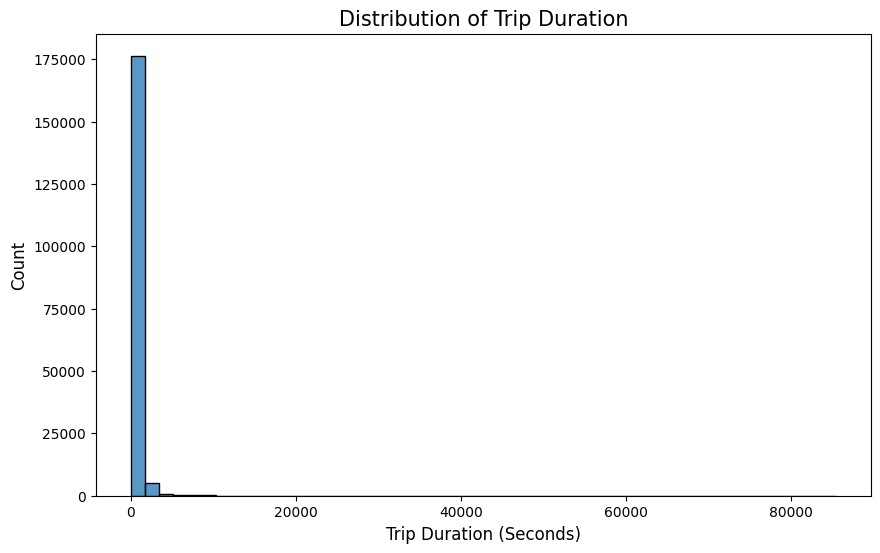

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot the distribution of trip durations
sns.histplot(df['duration_sec'], bins=50, kde=False)

# Add a title and labels
plt.title('Distribution of Trip Duration', fontsize=15)
plt.xlabel('Trip Duration (Seconds)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


## (Visualization 2) User Type Distribution

Comment:
This bar chart shows the distribution of user types within the Ford GoBike system. The dataset is dominated by Subscribers, indicating that the majority of users are regular, recurring customers rather than occasional Customers. Understanding this breakdown is crucial for service planning and marketing strategies.

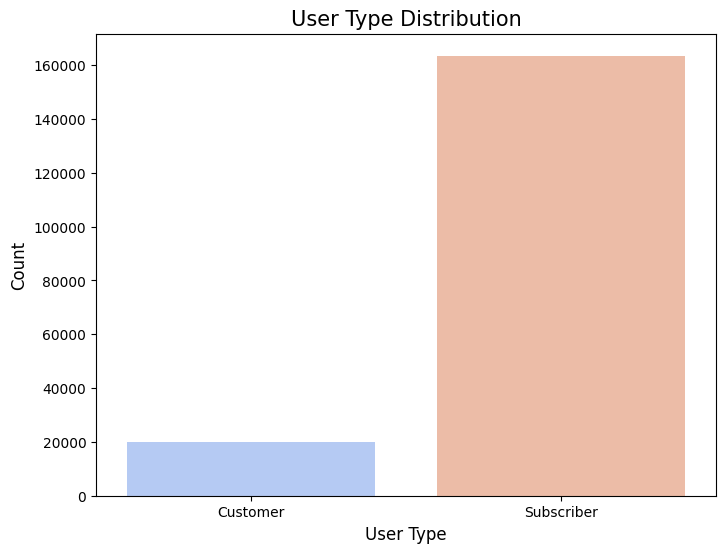

In [9]:
plt.figure(figsize=(8, 6))

# Plot the distribution of user types
sns.countplot(data=df, x='user_type', palette='coolwarm')

# Add title and labels
plt.title('User Type Distribution', fontsize=15)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


## (Visualization 3) Trip Duration by User Type

Comment:
This box plot visualizes the difference in trip duration between Subscribers and Customers. While the median trip duration is similar for both groups, there’s a wider range of trip durations among Customers, including some longer rides. This suggests that casual users may take more leisurely or infrequent trips, while subscribers are likely using the service more consistently, possibly for commuting.

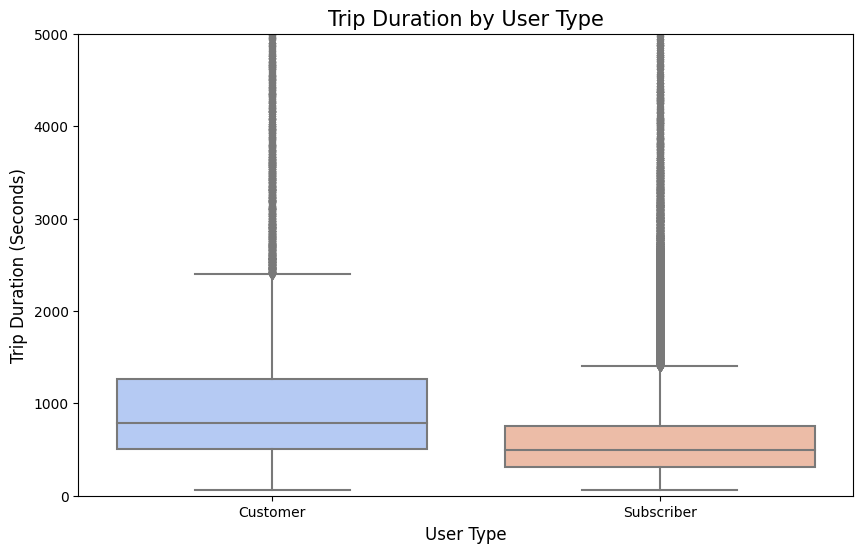

In [10]:
plt.figure(figsize=(10, 6))

# Plot the trip duration by user type
sns.boxplot(data=df, x='user_type', y='duration_sec', palette='coolwarm')

# Add title and labels
plt.title('Trip Duration by User Type', fontsize=15)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Trip Duration (Seconds)', fontsize=12)

# Show the plot
plt.ylim(0, 5000)  # Limiting y-axis for better visualization
plt.show()
